In [134]:
import os
import torch
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from monai.transforms import LoadImage, EnsureChannelFirst, Spacing, CropForeground, SaveImage, Flip, Rotate90

In [144]:
# Define file paths
ct_scan_path = "/home/hemin/Survival_Nikhil/data/CRLM-CT-1060/output.nii.gz"
liver_mask_path = "/home/hemin/Survival_Nikhil/data/CRLM-CT-1060/seg.nii.gz"

#cropped_output_path = "path/to/cropped_ct.nii.gz"

In [205]:

# Load CT scan and liver mask
load_image = LoadImage(image_only=True)
ct_scan = load_image(ct_scan_path)
liver_mask = load_image(liver_mask_path)

# Ensure correct channel format
ct_scan = EnsureChannelFirst()(ct_scan)
liver_mask = EnsureChannelFirst()(liver_mask)

ct_scan = Rotate90(spatial_axes=(0, 1))(ct_scan)
liver_mask = Rotate90(spatial_axes=(0, 1))(liver_mask)
liver_mask = Flip(spatial_axis=0)(liver_mask)

liver_mask = (liver_mask >=1)*1

# Crop using the liver mask
cropper = CropForeground(select_fn=lambda x: x > 0)

to_be_croped = ct_scan * liver_mask

cropped_ct = cropper(to_be_croped)

In [206]:
print(to_be_croped.shape)
print(ct_scan.shape)
print(liver_mask.shape)
print(cropped_ct.shape)

torch.Size([1, 512, 512, 52])
torch.Size([1, 512, 512, 52])
torch.Size([1, 512, 512, 52])
torch.Size([1, 234, 240, 36])


In [207]:
# Save cropped CT scan
#save_transform = SaveImage(output_dir=os.path.dirname(cropped_output_path), output_postfix="cropped", separate_folder=False)
#save_transform(cropped_ct)

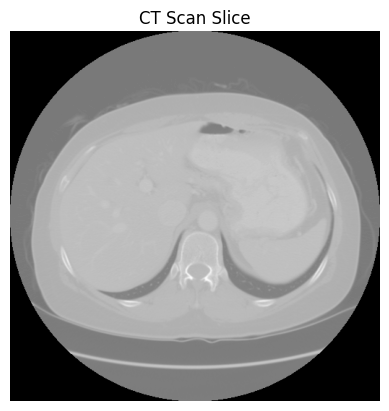

In [208]:
# Display a slice
slice_index = ct_scan.shape[3] // 2  # Middle slice
slice_index = 35
plt.imshow(ct_scan[0, :, :, slice_index], cmap='gray')
plt.title("CT Scan Slice")
plt.axis("off")
plt.show()

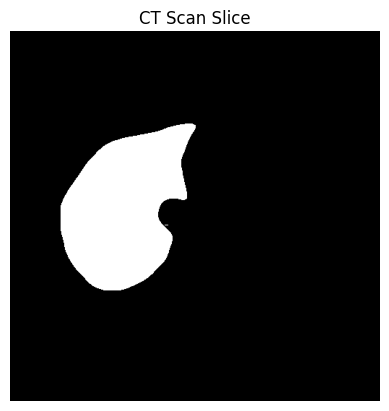

In [209]:
# Display a slice
plt.imshow(liver_mask[0, :, :, slice_index], cmap='gray')
plt.title("CT Scan Slice")
plt.axis("off")
plt.show()

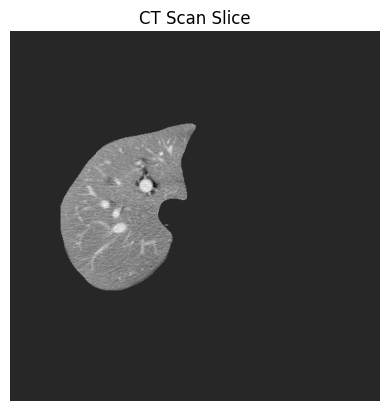

In [210]:
# Display a slice
plt.imshow(to_be_croped[0, :, :, slice_index], cmap='gray')
plt.title("CT Scan Slice")
plt.axis("off")
plt.show()

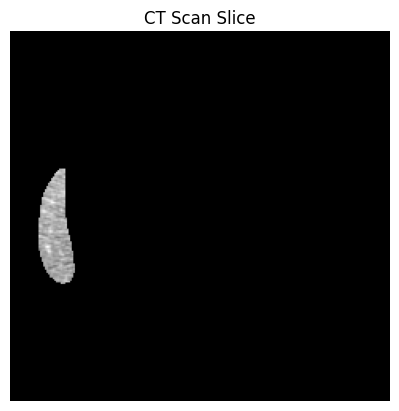

In [211]:
# Display a slice
plt.imshow(cropped_ct[0, :, :, 1], cmap='gray')
plt.title("CT Scan Slice")
plt.axis("off")
plt.show()